In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
import scipy.stats as stat
from sklearn.metrics import roc_curve, roc_auc_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
df_data_inputs_train = pd.read_csv('df_data_inputs_train.csv', index_col = 0)
df_data_targets_train = pd.read_csv('df_data_targets_train.csv', index_col = 0)
df_data_inputs_test = pd.read_csv('df_data_inputs_test.csv', index_col = 0)
df_data_targets_test = pd.read_csv('df_data_targets_test.csv', index_col = 0)

In [13]:
df_data_inputs_train.head()

,Unnamed: 0.1,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,...,tract_owner_occupied_units:1000-1350,tract_owner_occupied_units:1350-2300,tract_owner_occupied_units:>2300,tract_one_to_four_family_homes_factor,tract_median_age_of_housing_units_factor,tract_median_age_of_housing_units:<25,tract_median_age_of_housing_units:25-40,tract_median_age_of_housing_units:40-50,tract_median_age_of_housing_units:50-65,tract_median_age_of_housing_units:>65
666668,3421833,2020,AD6GFRVSDT01YPT1CS68,14010,IL,17113.0,1.711300e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,...,0,0,1,"(2550.04, 2618.96]","(19.76, 21.28]",1,0,0,0,0
638545,3346674,2020,KB1H1DSPRFMYMCUFXT09,16984,IL,17031.0,1.703103e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,...,0,0,0,"(-3.446, 68.92]","(57.76, 59.28]",0,0,0,1,0
554979,2833551,2020,RVDPPPGHCGZ40J4VQ731,20994,IL,17093.0,1.709389e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,...,0,1,0,"(1860.84, 1929.76]","(25.84, 27.36]",0,1,0,0,0
692734,3609944,2020,549300FGXN1K3HLB1R50,16984,IL,17031.0,1.703181e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,...,0,1,0,"(2067.6, 2136.52]","(57.76, 59.28]",0,0,0,1,0
39581,117211,2020,6BYL5QZYBDK8S7L73M02,20994,IL,17089.0,1.708985e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,...,0,0,1,"(3377.08, 3446.0]","(10.64, 12.16]",1,0,0,0,0


In [14]:
df_data_targets_train.head()

,approve_status
666668,0.0
638545,1.0
554979,1.0
692734,1.0
39581,1.0


In [15]:
df_data_inputs_train.shape

(600560, 365)

In [16]:
df_data_targets_train.shape

(600560, 1)

In [17]:
df_data_inputs_test.shape

(150140, 365)

In [18]:
df_data_targets_test.shape

(150140, 1)

## Selecting Features

In [19]:
lst_cat = pd.read_excel('list of cats.xlsx')
cat_lst = lst_cat.iloc[:,0].tolist()

lst_ref = pd.read_excel('ref cats.xlsx')
ref_lst = lst_ref.iloc[:,0].tolist()

In [20]:
inputs_train_with_ref_cat = df_data_inputs_train.loc[: ,cat_lst]
inputs_train = inputs_train_with_ref_cat.drop(ref_lst, axis = 1)
inputs_train.head()

,conforming_loan_limit:C,conforming_loan_limit:NA,derived_loan_product_type:CS_FHAS_FSARHSS,derived_loan_product_type:FHA:First Lien,derived_loan_product_type:CF_FSARHSF,derived_dwelling_category:Single Family (1-4 Units):Manufactured,derived_dwelling_category:Single Family (1-4 Units):Site-Built,derived_ethnicity:ffto_hislto,derived_ethnicity:joint_nothislat,derived_race:ffto_2more,...,tract_owner_occupied_units:<120,tract_owner_occupied_units:120-250,tract_owner_occupied_units:250-300,tract_owner_occupied_units:300-1000,tract_owner_occupied_units:1000-1350,tract_owner_occupied_units:1350-2300,tract_median_age_of_housing_units:<25,tract_median_age_of_housing_units:25-40,tract_median_age_of_housing_units:40-50,tract_median_age_of_housing_units:50-65
666668,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
638545,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
554979,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
692734,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
39581,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## Model Building

### Logistic regression

In [21]:
reg = LogisticRegression()
reg.fit(inputs_train, df_data_targets_train)

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
reg.intercept_

array([0.88702761])

In [23]:
reg.coef_

array([[-0.34131522,  0.62102334, -0.31569107, -0.22124625, -1.06760417,
         0.20872731,  0.03638424, -0.18574236,  0.12963723, -0.41664239,
        -0.23740817,  0.04430963,  0.32226193,  0.05960291, -0.16443717,
        -0.09612016, -0.24824472,  0.87922742,  0.61049604,  0.12672943,
        -0.626472  ,  0.41241435,  0.02521382, -0.34003635,  0.58037967,
         0.5338152 ,  0.35348099,  0.16408259, -0.02614255,  0.19925945,
         0.31647732,  0.46870033,  0.15891627,  0.76942702, -0.14181042,
         0.15835891,  0.46925769,  0.56562423,  0.09860789, -0.29719008,
         0.18077518,  0.106597  ,  0.22333671,  0.38499237, -0.08166898,
         0.2073855 , -0.01119496,  0.25630651, -0.12783232, -1.37482085,
        -3.93060387,  1.50431435,  0.20632996,  0.38471792,  0.43541396,
         0.64089053,  0.73151168,  0.80622832,  0.77153485,  0.74844888,
         0.09730739, -0.23277835,  0.62953798, -0.03218661,  0.01680443,
        -0.14453164, -1.06447017, -0.34943592, -0.3

In [24]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns=['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,0.887028
1,conforming_loan_limit:C,-0.341315
2,conforming_loan_limit:NA,0.621023
3,derived_loan_product_type:CS_FHAS_FSARHSS,-0.315691
4,derived_loan_product_type:FHA:First Lien,-0.221246
...,...,...
138,tract_owner_occupied_units:1350-2300,-0.007155
139,tract_median_age_of_housing_units:<25,-0.063992
140,tract_median_age_of_housing_units:25-40,-0.037655
141,tract_median_age_of_housing_units:40-50,-0.070436


### Logistic regression with p-values

In [25]:
class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [26]:
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train, df_data_targets_train)
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-25-ca71f02b974d>:12: RuntimeWarning: invalid value encountered in sqrt
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))


,Feature name,Coefficients
0,Intercept,0.887028
1,conforming_loan_limit:C,-0.341315
2,conforming_loan_limit:NA,0.621023
3,derived_loan_product_type:CS_FHAS_FSARHSS,-0.315691
4,derived_loan_product_type:FHA:First Lien,-0.221246
...,...,...
138,tract_owner_occupied_units:1350-2300,-0.007155
139,tract_median_age_of_housing_units:<25,-0.063992
140,tract_median_age_of_housing_units:25-40,-0.037655
141,tract_median_age_of_housing_units:40-50,-0.070436


In [27]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['P Values'] = p_values
summary_table

,Feature name,Coefficients,P Values
0,Intercept,0.887028,NaN
1,conforming_loan_limit:C,-0.341315,4.854401e-15
2,conforming_loan_limit:NA,0.621023,4.913246e-01
3,derived_loan_product_type:CS_FHAS_FSARHSS,-0.315691,2.932139e-01
4,derived_loan_product_type:FHA:First Lien,-0.221246,3.159718e-01
...,...,...,...
138,tract_owner_occupied_units:1350-2300,-0.007155,7.542547e-01
139,tract_median_age_of_housing_units:<25,-0.063992,3.803697e-03
140,tract_median_age_of_housing_units:25-40,-0.037655,5.671905e-02
141,tract_median_age_of_housing_units:40-50,-0.070436,4.616579e-04


In [28]:
# Select only significant variables
cond = summary_table['P Values'] < 0.05
all_sig_vars = summary_table.loc[cond]['Feature name'].tolist()

all_vars = summary_table['Feature name'].tolist()[1:]
sig_var_parent = list(set([var.split(':')[0] for var in all_sig_vars]))
sig_vars = [var for var in all_vars if var.split(':')[0] in sig_var_parent]
len(sig_vars)

107

In [29]:
sig_vars

['conforming_loan_limit:C',
 'conforming_loan_limit:NA',
 'derived_loan_product_type:CS_FHAS_FSARHSS',
 'derived_loan_product_type:FHA:First Lien',
 'derived_loan_product_type:CF_FSARHSF',
 'derived_ethnicity:ffto_hislto',
 'derived_ethnicity:joint_nothislat',
 'derived_race:ffto_2more',
 'derived_race:aia_baa_nwop',
 'derived_race:Asian',
 'derived_race:White',
 'derived_race:Joint',
 'derived_sex:Female',
 'derived_sex:Joint',
 'derived_sex:Male',
 'preapproval:1',
 'loan_type:1',
 'loan_type:2',
 'loan_purpose:2_4',
 'loan_purpose:1',
 'loan_purpose:31',
 'loan_purpose:32',
 'lien_status:1',
 'occupancy_type:1',
 'occupancy_type:2',
 'debt_to_income_ratio:50%-60%',
 'debt_to_income_ratio:>60%',
 'debt_to_income_ratio:NA',
 'debt_to_income_ratio:46-49',
 'debt_to_income_ratio:<20%',
 'debt_to_income_ratio:45',
 'debt_to_income_ratio:42-44',
 'debt_to_income_ratio:36-41',
 'debt_to_income_ratio:20%-<30%',
 'debt_to_income_ratio:30%-<36%',
 'applicant_credit_score_type:7',
 'applicant_

In [49]:
sig_var_parent

['income',
 'derived_loan_product_type',
 'tract_population',
 'conforming_loan_limit',
 'derived_race',
 'loan_amount',
 'loan_purpose',
 'debt_to_income_ratio',
 'preapproval',
 'derived_sex',
 'co-applicant_credit_score_type',
 'tract_owner_occupied_units',
 'loan_type',
 'applicant_age',
 'lien_status',
 'applicant_credit_score_type',
 'property_value',
 'tract_minority_population_percent',
 'tract_to_msa_income_percentage',
 'tract_median_age_of_housing_units',
 'occupancy_type',
 'co-applicant_age',
 'derived_ethnicity']

### Build Logistic regression with only significant features

In [30]:
inputs_train = df_data_inputs_train[sig_vars]
inputs_train.head()

,conforming_loan_limit:C,conforming_loan_limit:NA,derived_loan_product_type:CS_FHAS_FSARHSS,derived_loan_product_type:FHA:First Lien,derived_loan_product_type:CF_FSARHSF,derived_ethnicity:ffto_hislto,derived_ethnicity:joint_nothislat,derived_race:ffto_2more,derived_race:aia_baa_nwop,derived_race:Asian,...,tract_owner_occupied_units:<120,tract_owner_occupied_units:120-250,tract_owner_occupied_units:250-300,tract_owner_occupied_units:300-1000,tract_owner_occupied_units:1000-1350,tract_owner_occupied_units:1350-2300,tract_median_age_of_housing_units:<25,tract_median_age_of_housing_units:25-40,tract_median_age_of_housing_units:40-50,tract_median_age_of_housing_units:50-65
666668,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
638545,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
554979,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
692734,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
39581,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, df_data_targets_train)

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,3.160783
1,conforming_loan_limit:C,0.576398
2,conforming_loan_limit:NA,0.634169
3,derived_loan_product_type:CS_FHAS_FSARHSS,0.142999
4,derived_loan_product_type:FHA:First Lien,-0.765644
...,...,...
103,tract_owner_occupied_units:1350-2300,-0.004971
104,tract_median_age_of_housing_units:<25,-0.047510
105,tract_median_age_of_housing_units:25-40,-0.022275
106,tract_median_age_of_housing_units:40-50,-0.062569


In [33]:
# Add P values
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['P Values'] = p_values
summary_table

,Feature name,Coefficients,P Values
0,Intercept,3.160783,NaN
1,conforming_loan_limit:C,0.576398,2.667212e-49
2,conforming_loan_limit:NA,0.634169,6.586246e-13
3,derived_loan_product_type:CS_FHAS_FSARHSS,0.142999,5.648428e-01
4,derived_loan_product_type:FHA:First Lien,-0.765644,1.136749e-03
...,...,...,...
103,tract_owner_occupied_units:1350-2300,-0.004971,8.162836e-01
104,tract_median_age_of_housing_units:<25,-0.047510,1.969205e-02
105,tract_median_age_of_housing_units:25-40,-0.022275,2.200893e-01
106,tract_median_age_of_housing_units:40-50,-0.062569,7.339016e-04


In [34]:
pickle.dump(reg2, open('model_sigvars.sav', 'wb'))

## Model Validation

In [35]:
inputs_test  = df_data_inputs_test[sig_vars]
inputs_test.head()

,conforming_loan_limit:C,conforming_loan_limit:NA,derived_loan_product_type:CS_FHAS_FSARHSS,derived_loan_product_type:FHA:First Lien,derived_loan_product_type:CF_FSARHSF,derived_ethnicity:ffto_hislto,derived_ethnicity:joint_nothislat,derived_race:ffto_2more,derived_race:aia_baa_nwop,derived_race:Asian,...,tract_owner_occupied_units:<120,tract_owner_occupied_units:120-250,tract_owner_occupied_units:250-300,tract_owner_occupied_units:300-1000,tract_owner_occupied_units:1000-1350,tract_owner_occupied_units:1350-2300,tract_median_age_of_housing_units:<25,tract_median_age_of_housing_units:25-40,tract_median_age_of_housing_units:40-50,tract_median_age_of_housing_units:50-65
717247,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
323261,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
270923,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
262083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
318715,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

array([1., 1., 1., ..., 1., 1., 1.])

In [37]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.20597546, 0.79402454],
       [0.06009716, 0.93990284],
       [0.04823573, 0.95176427],
       ...,
       [0.07667869, 0.92332131],
       [0.28704924, 0.71295076],
       [0.00518659, 0.99481341]])

In [38]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
y_hat_test_proba

array([0.79402454, 0.93990284, 0.95176427, ..., 0.92332131, 0.71295076,
       0.99481341])

In [39]:
df_data_targets_test_temp = df_data_targets_test.copy()
df_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [40]:
df_actual_predicted_probs = \
pd.concat([df_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes
df_actual_predicted_probs.columns = \
['loan_data_targets_test', 'y_hat_test_proba']
# Rename the columns
df_actual_predicted_probs.index = df_data_targets_test.index
# Revert the index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
717247,1.0,0.794025
323261,1.0,0.939903
270923,1.0,0.951764
262083,1.0,0.870900
318715,1.0,0.910538


### Confusion Matrix

In [41]:
tr = 0.5
df_actual_predicted_probs['y_hat_test'] = \
np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
df_actual_predicted_probs

,loan_data_targets_test,y_hat_test_proba,y_hat_test
717247,1.0,0.794025,1
323261,1.0,0.939903,1
270923,1.0,0.951764,1
262083,1.0,0.870900,1
318715,1.0,0.910538,1
...,...,...,...
616464,1.0,0.973524,1
156983,0.0,0.768913,1
566372,1.0,0.923321,1
658194,0.0,0.712951,1


In [42]:
confusion_matrix = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                               df_actual_predicted_probs['y_hat_test'],
                               rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0.0,5212,12409
1.0,1601,130918


In [43]:
confusion_matrix_per = confusion_matrix / df_actual_predicted_probs.shape[0]
confusion_matrix_per

Predicted,0,1
Actual,,
0.0,0.034714,0.082650
1.0,0.010663,0.871973


In [44]:
true_neg = confusion_matrix_per.iloc[0,0]
true_pos = confusion_matrix_per.iloc[1,1]
true_rate = true_neg + true_pos
true_rate

0.9066870920474225

### ROC Curve and AUC

In [45]:
log_roc = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], 
                    df_actual_predicted_probs['y_hat_test_proba'])
log_roc

(array([0.        , 0.        , 0.        , ..., 0.99563021, 0.99563021,
        1.        ]),
 array([0.00000000e+00, 7.54608773e-06, 1.28283491e-04, ...,
        9.99992454e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99950373e+00, 9.99503731e-01, 9.99353724e-01, ...,
        3.03299057e-03, 3.00293559e-03, 5.41444362e-04]))

In [46]:
fpr,tpr,thresholds = log_roc

Text(0.5, 1.0, 'ROC curve')

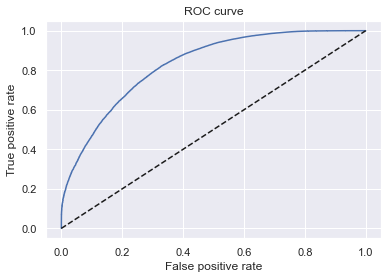

In [47]:
plt.plot(fpr,tpr)
plt.plot(tpr,tpr, linestyle = '--', color ='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [48]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], 
                      df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.8285625843415072